# Neural Network with Pre-Selection


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utilities import Data, Consts
import data_pipeline as dp
import pickle

## Pre-Selection
We start by implementing the simulated pre-selection cuts. They are different for the simulated and real data. The cut strings have been made by Dan. The function below just finds all the features that are needed and fetches them. It then turns the string into a format that can just be fed into the dataframe.

In [2]:
s = "(((( Lb_M01_Subst0_p2K <1019.461-12)|( Lb_M01_Subst0_p2K >1019.461+12))&((((((243716.98437715+ p_P **2)**0.5+ K_PE + L2_PE )**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2000)&(((((243716.98437715+ p_P **2)**0.5+ K_PE + L1_PE )**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2000))&((((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(0.26112103+ L2_P **2)**0.5)**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2320)&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&(((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(11163.69140675+ L1_P **2)**0.5)**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2320)&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0)))))&(( Lb_M23 >3178.05)|( Lb_M23 <3000))&((((((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)>1865+20)|(((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&((((((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)>3097+35)|(((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)<3097-35))&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))&((((((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)>1865+20)|(((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID >0)&( p_ID >0))|(( L2_ID <0)&( p_ID <0))))|((( L1_ID >0)&( p_ID >0))|(( L1_ID <0)&( p_ID <0))))&((( p_PX * L1_PX + p_PY * L1_PY + p_PZ * L1_PZ )/( p_P * L1_P )<np.cos(1e-3))&(( p_PX * L2_PX + p_PY * L2_PY + p_PZ * L2_PZ )/( p_P * L2_P )<np.cos(1e-3))&(( K_PX * L1_PX + K_PY * L1_PY + K_PZ * L1_PZ )/( K_P * L1_P )<np.cos(1e-3))&(( K_PX * L2_PX + K_PY * L2_PY + K_PZ * L2_PZ )/( K_P * L2_P )<np.cos(1e-3)))&(( p_PX * K_PX + p_PY * K_PY + p_PZ * K_PZ )/( p_P * K_P )<np.cos(1e-3)))&( L1_L0MuonDecision_TOS )&(( Lb_Hlt1TrackMVADecision_TOS )|( Lb_Hlt1TrackMuonDecision_TOS ))&( Lb_Hlt2Topo2BodyDecision_TOS | Lb_Hlt2Topo3BodyDecision_TOS | Lb_Hlt2Topo4BodyDecision_TOS | Lb_Hlt2TopoMu2BodyDecision_TOS | Lb_Hlt2TopoMu3BodyDecision_TOS | Lb_Hlt2TopoMu4BodyDecision_TOS )&(( LStar_M >1448)&( LStar_M <1591))&(( Lb_BKGCAT ==10)|( Lb_BKGCAT ==50)))"
r = "((( Lb_M01_Subst0_p2K <1019.461-12)|( Lb_M01_Subst0_p2K >1019.461+12))&((((((243716.98437715+ p_P **2)**0.5+ K_PE + L2_PE )**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2000)&(((((243716.98437715+ p_P **2)**0.5+ K_PE + L1_PE )**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2000))&((((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(0.26112103+ L2_P **2)**0.5)**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2320)&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&(((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(11163.69140675+ L1_P **2)**0.5)**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2320)&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0)))))&(( Lb_M23 >3178.05)|( Lb_M23 <3000))&((((((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)>1865+20)|(((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&((((((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)>3097+35)|(((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)<3097-35))&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))&((((((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)>1865+20)|(((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID >0)&( p_ID >0))|(( L2_ID <0)&( p_ID <0))))|((( L1_ID >0)&( p_ID >0))|(( L1_ID <0)&( p_ID <0))))&((( p_PX * L1_PX + p_PY * L1_PY + p_PZ * L1_PZ )/( p_P * L1_P )<np.cos(1e-3))&(( p_PX * L2_PX + p_PY * L2_PY + p_PZ * L2_PZ )/( p_P * L2_P )<np.cos(1e-3))&(( K_PX * L1_PX + K_PY * L1_PY + K_PZ * L1_PZ )/( K_P * L1_P )<np.cos(1e-3))&(( K_PX * L2_PX + K_PY * L2_PY + K_PZ * L2_PZ )/( K_P * L2_P )<np.cos(1e-3)))&(( p_PX * K_PX + p_PY * K_PY + p_PZ * K_PZ )/( p_P * K_P )<np.cos(1e-3)))"
# The pre-selection strings

In [3]:
simulated_fts, sdfstring = dp.get_required_features(s, df_prefix='sf')
real_fts, rdfstring = dp.get_required_features(r, df_prefix='rf')
# Find the features needed from pre-selection string

real, sim = Data(*Consts().get_real_tuple()), Data(*Consts().get_simulated_tuple())
rf, sf = real.fetch_features(real_fts), sim.fetch_features(simulated_fts)
# Gather all those features, remember we get eventNumber returned as an index

pre_selection_rf = rf[eval(rdfstring)]
pre_selection_sf = sf[eval(sdfstring)]
# Apply the pre-selection criteria

The pre-selections really did cut our data down alot! We removed 76.2% of the real data and 79.9% of the simulated data. Oh no, we are going to need more data now.

In [4]:
# Get the eventNumber of the remaining events, these are the only ones we will use to train any future neural network.
real_eventNumbers = pre_selection_rf.index.to_list()
sim_eventNumbers = pre_selection_sf.index.to_list()

keep_events = {
    'real': real_eventNumbers,
    'sim': sim_eventNumbers
}

## Reading in Data

In [24]:
chi2 = pd.read_csv('common_features.txt', sep=' ')['Feature']
chi2 = [feat for feat in chi2 if 'chi2' in feat.lower()]
# Get all the CHI2 features that are common to the sets
errs = pd.read_csv('error_features.txt', sep=' ')['Feature'].to_list()
chi2 = [f for f in chi2 if f not in errs]
# Remove all CHI2 features that cause errors in the reading process
len(chi2)

133


127

In [18]:
particle_features = ['Theta', 'MINIP', 'PX', 'PY', 'PZ', 'PT']
particles = ['L1', 'L2', 'p', 'K']
feats = [particle + "_" + ft for ft in particle_features for particle in particles]
feats += chi2
# Define the set of features we want to have, PVCHI2 seems to cause weird errors
len(feats)

155

In [19]:
df = dp.get_combined_data(feats, keep_only_events=keep_events, random_shuffle=True, random_state=0)
# I will always use n a random state of zero for reproducibility of the notebook
# This fetches 

Fetching features


AttributeError: 'tuple' object has no attribute 'set_index'

## Feature Engineering
Now we will make some new features out of those that we have already requested. This could significantly improve network performance. Essentially it does the job of the network for it. For example we expect some angles and differences between angles to be useful.

Note that we do not need to review these distributions since these have already been done in a previous notebook. Essentially they all look somewhat similar, maybe this is bad for performance but at least it shows that the simulated data is reproducing the real data well. 

In [ ]:
for particle in particles:
    df[particle + "_P"] = np.sqrt(df[particle + "_PT"]**2 + df[particle + "_PZ"]**2)
    df[particle + '_alpha'] = np.arcsin(df[particle + '_PT']/df[particle + '_P'])
    df[particle + '_normPT'] = df[particle + "_PT"]/df[particle + "_P"]
    
combinations = np.array([
    ['L1', 'L2'],
    ['L1', 'p'],
    ['L1', 'K'],
    ['L2', 'p'],
    ['L2', 'K'],
    ['p', 'K']
])

for combo in combinations:
    namePT = f"{combo[0]}_minus_PT_{combo[1]}"
    nameALPHA = f"{combo[0]}_minus_alpha_{combo[1]}"
    df[namePT] = df[combo[0] + "_normPT"] - df[combo[1] + "_normPT"]
    df[nameALPHA] = df[combo[0] + "_alpha"] - df[combo[1] + "_alpha"]

## Model Design and Training

In [ ]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = dp.prepare_data(df, train_frac=0.6, val_frac=0.2, test_frac=0.2, random_state=1)
# Get the training, validation and test data, also inspect it for proof-of-concept

X_train.shape, y_train.shape, X_val.shape, X_test.shape

((21596, 51), (21596,), (7199, 51), (7200, 51))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import callbacks

early_stopping = keras.callbacks.EarlyStopping(patience=20, min_delta=0.001, restore_best_weights=True)
# Stop the training early when we really plateau

lr_schedule = callbacks.ReduceLROnPlateau(patience=5, factor=0.2, min_lr=0.001)
# Adjust learning rate when we start to plateau during training

m = keras.Sequential()
m.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.Dropout(0.2))
m.add(layers.BatchNormalization())
m.add(layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.Dropout(0.2))
m.add(layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.BatchNormalization())
m.add(layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.Dense(1, activation='sigmoid'))
m.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])
m_history = m.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_schedule])
with open('train_history/v2.3.2_histDict', 'wb') as file_pi:
    pickle.dump(m_history.history, file_pi)
    # Write out the raw dictionary history
m.save('models/v2.3.2')

2022-02-09 10:54:37.983217: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-09 10:54:38.013212: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-09 10:54:38.179725: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-09 10:54:38.193110: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100000000 Hz


Epoch 1/100
22/22 [==============================] - 6s 152ms/step - loss: 4.4571 - binary_accuracy: 0.8736 - auc: 0.7570 - true_positives: 420.0000 - true_negatives: 18447.0000 - false_positives: 505.0000 - false_negatives: 2224.0000 - val_loss: 3.9908 - val_binary_accuracy: 0.8850 - val_auc: 0.8145 - val_true_positives: 97.0000 - val_true_negatives: 6274.0000 - val_false_positives: 27.0000 - val_false_negatives: 801.0000
Epoch 2/100
22/22 [==============================] - 2s 106ms/step - loss: 3.3382 - binary_accuracy: 0.8924 - auc: 0.8464 - true_positives: 679.0000 - true_negatives: 18594.0000 - false_positives: 358.0000 - false_negatives: 1965.0000 - val_loss: 3.0295 - val_binary_accuracy: 0.8757 - val_auc: 0.8766 - val_true_positives: 4.0000 - val_true_negatives: 6300.0000 - val_false_positives: 1.0000 - val_false_negatives: 894.0000
Epoch 3/100
22/22 [==============================] - 2s 92ms/step - loss: 2.5053 - binary_accuracy: 0.8966 - auc: 0.8730 - true_positives: 826.0000 

2022-02-09 10:57:13.925496: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/v2.3.2/assets


In [ ]:
history = pickle.load(open('train_history/v2.3.2_histDict', "rb"))
nepochs = len(history['loss'])

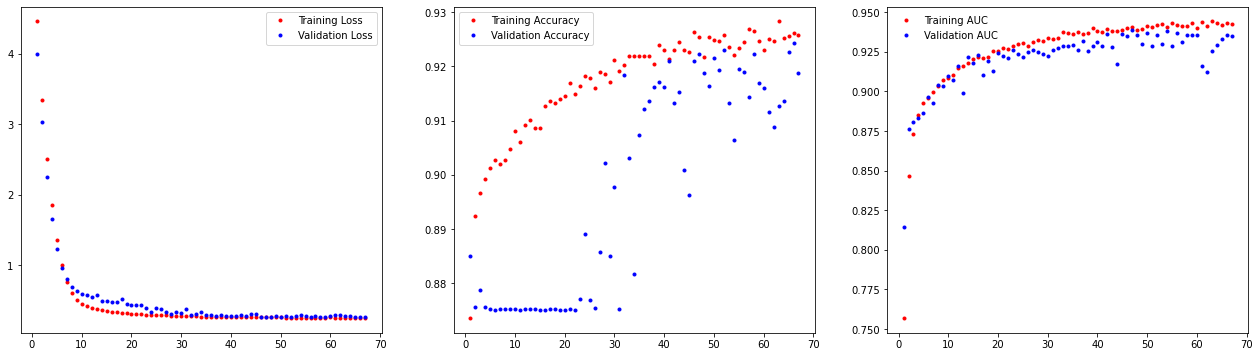

In [ ]:
dp.plot_history_curves(history, nepochs)

## ROC Curve Analysis
Now that we have got a pretty good semi-initial model we can plot the ROC curve. This will help us spot overfitting and really accelerate our models development. It will allow us to see what type of error our model has preference to, does it incorrectly reject signal or incorrectly accept background more often?

In [ ]:
roc_history = m_history.history

train_signal_efficiency = roc_history['true_positives'] /  y_train.value_counts()[1]
val_signal_efficiency = roc_history['val_true_positives'] /  y_val.value_counts()[1]
# What percentage of total signal events were identified as signal events

train_background_rej = 1 - (roc_history['false_positives'] / y_train.value_counts()[0])
val_background_rej = 1 - (roc_history['val_false_positives'] / y_val.value_counts()[0])
# The number of true positives to total positivesa

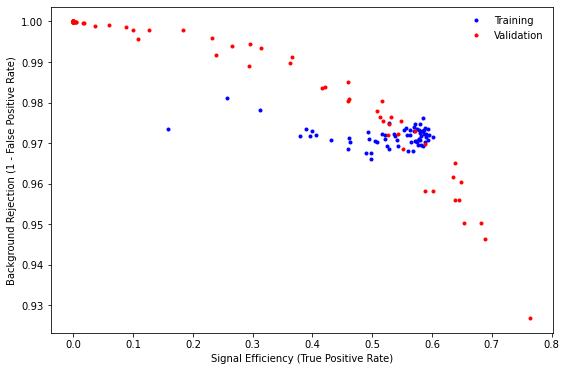

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(train_signal_efficiency, train_background_rej, 'b.', label='Training')
ax.plot(val_signal_efficiency, val_background_rej, 'r.', label='Validation')
ax.set_ylabel('Background Rejection (1 - False Positive Rate)')
ax.set_xlabel('Signal Efficiency (True Positive Rate)')
plt.legend(frameon=False)
plt.show()